In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.float_format", lambda x: f"{x:.3f}")
sns.set(style="whitegrid", palette="pastel")

DATA_PATH = "./data/"  
YEARS = [2015, 2016, 2017, 2018, 2019]
FILES = {y: f"{DATA_PATH}{y}.csv" for y in YEARS}


raw = {}
for y, path in FILES.items():
    df = pd.read_csv(path)
    df["Year"] = y
    raw[y] = df
    print(f"{y}: {df.shape}")


2015: (158, 13)
2016: (157, 14)
2017: (155, 13)
2018: (156, 10)
2019: (156, 10)


In [2]:
def to_common_columns(df):
    rename_map = {
        # País
        "Country": "Country",
        "Country or region": "Country",
        # Target
        "Happiness Score": "Happiness Score",
        "Happiness.Score": "Happiness Score",
        "Score": "Happiness Score",
        # GDP
        "Economy (GDP per Capita)": "GDP per Capita",
        "Economy..GDP.per.Capita.": "GDP per Capita",
        "GDP per capita": "GDP per Capita",
        # Salud
        "Health (Life Expectancy)": "Healthy life expectancy",
        "Health..Life.Expectancy.": "Healthy life expectancy",
        "Healthy life expectancy": "Healthy life expectancy",
        # Apoyo social
        "Family": "Social support",
        "Social support": "Social support",
        # Libertad
        "Freedom": "Freedom",
        "Freedom to make life choices": "Freedom",
        # Generosidad
        "Generosity": "Generosity",
        # Corrupción percibida
        "Trust (Government Corruption)": "Perceptions of corruption",
        "Trust..Government.Corruption.": "Perceptions of corruption",
        "Perceptions of corruption": "Perceptions of corruption",
    }
    
    df = df.rename(columns={k: v for k, v in rename_map.items() if k in df.columns})
    return df

for y in raw:
    raw[y] = to_common_columns(raw[y])


for y in YEARS:
    print(y, sorted(list(set(raw[y].columns) & {
        "Country","Year","Happiness Score","GDP per Capita",
        "Healthy life expectancy","Social support","Freedom",
        "Generosity","Perceptions of corruption"
    })))



2015 ['Country', 'Freedom', 'GDP per Capita', 'Generosity', 'Happiness Score', 'Healthy life expectancy', 'Perceptions of corruption', 'Social support', 'Year']
2016 ['Country', 'Freedom', 'GDP per Capita', 'Generosity', 'Happiness Score', 'Healthy life expectancy', 'Perceptions of corruption', 'Social support', 'Year']
2017 ['Country', 'Freedom', 'GDP per Capita', 'Generosity', 'Happiness Score', 'Healthy life expectancy', 'Perceptions of corruption', 'Social support', 'Year']
2018 ['Country', 'Freedom', 'GDP per Capita', 'Generosity', 'Happiness Score', 'Healthy life expectancy', 'Perceptions of corruption', 'Social support', 'Year']
2019 ['Country', 'Freedom', 'GDP per Capita', 'Generosity', 'Happiness Score', 'Healthy life expectancy', 'Perceptions of corruption', 'Social support', 'Year']


In [3]:

COMMON_COLS = [
    "Country", "Year", "Happiness Score",
    "GDP per Capita", "Healthy life expectancy",
    "Social support", "Freedom", "Generosity",
    "Perceptions of corruption",
]


df_all = pd.concat(
    [raw[y][[c for c in COMMON_COLS if c in raw[y].columns]] for y in YEARS],
    ignore_index=True
)

print(" Dataset unificado:", df_all.shape)
df_all.head()


 Dataset unificado: (782, 9)


,Country,Year,Happiness Score,GDP per Capita,Healthy life expectancy,Social support,Freedom,Generosity,Perceptions of corruption
0,Switzerland,2015,7.587,1.397,0.941,1.350,0.666,0.297,0.420
1,Iceland,2015,7.561,1.302,0.948,1.402,0.629,0.436,0.141
2,Denmark,2015,7.527,1.325,0.875,1.361,0.649,0.341,0.484
3,Norway,2015,7.522,1.459,0.885,1.331,0.670,0.347,0.365
4,Canada,2015,7.427,1.326,0.906,1.323,0.633,0.458,0.330


In [16]:


print(" Valores nulos ")
print(df_all.isna().sum().sort_values(ascending=False).head(10000))

print(" Estadísticas descriptivas")
display(df_all.describe(include="all"))


 Valores nulos 
Perceptions of corruption    1
Country                      0
Year                         0
GDP per Capita               0
Happiness Score              0
Healthy life expectancy      0
Social support               0
Freedom                      0
Generosity                   0
dtype: int64
 Estadísticas descriptivas


,Country,Year,Happiness Score,GDP per Capita,Healthy life expectancy,Social support,Freedom,Generosity,Perceptions of corruption
count,782,782.000,782.000,782.000,782.000,782.000,782.000,782.000,781.000
unique,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2016.994,5.379,0.916,0.612,1.078,0.411,0.219,0.125
std,NaN,1.417,1.127,0.407,0.248,0.330,0.153,0.122,0.106
min,NaN,2015.000,2.693,0.000,0.000,0.000,0.000,0.000,0.000
25%,NaN,2016.000,4.510,0.607,0.440,0.869,0.310,0.130,0.054
50%,NaN,2017.000,5.322,0.982,0.647,1.125,0.431,0.202,0.091
75%,NaN,2018.000,6.190,1.236,0.808,1.327,0.531,0.279,0.156


In [21]:
rows = []
for y, d in raw.items():
    rows.append({
        "Year": y,
        "Filas": d.shape[0],
        "Columnas": d.shape[1],
        "Numéricas": d.select_dtypes(include=[np.number]).shape[1],
        "Nulos totales": int(d.isna().sum().sum())
    })
overview = pd.DataFrame(rows).sort_values("Year")
display(overview)

# Columnas en común vs distintas
sets = {y: set(d.columns) for y, d in raw.items()}
intersect = set.intersection(*sets.values())
union = set.union(*sets.values())

print(" Columnas comunes a todos los años:", len(intersect))
print(sorted(list(intersect))[:30], "…")




,Year,Filas,Columnas,Numéricas,Nulos totales
0,2015,158,13,11,0
1,2016,157,14,12,0
2,2017,155,13,12,0
3,2018,156,10,9,1
4,2019,156,10,9,0


 Columnas comunes a todos los años: 9
['Country', 'Freedom', 'GDP per Capita', 'Generosity', 'Happiness Score', 'Healthy life expectancy', 'Perceptions of corruption', 'Social support', 'Year'] …


In [25]:
def find_col(df, needle):
    needle = needle.lower()
    for c in df.columns:
        if needle in c.lower():
            return c
    return None

def find_any(df, *needles):
    for n in needles:
        c = find_col(df, n)
        if c:
            return c
    return None

CANON = {
    "score": ["Happiness Score","Score"],
    "gdp": ["GDP per Capita","Economy (GDP per Capita)","Economy..GDP.per.Capita.","GDP per capita","GDP"],
    "life": ["Healthy life expectancy","Health (Life Expectancy)","Health..Life.Expectancy."],
    "social": ["Social support","Family"],
    "freedom": ["Freedom","Freedom to make life choices"],
    "generosity": ["Generosity"],
    "corruption": ["Perceptions of corruption","Trust (Government Corruption)","Trust..Government.Corruption."]
}

def get_colname(df, key):
    for pattern in CANON[key]:
        c = find_col(df, pattern)
        if c:
            return c
    return None



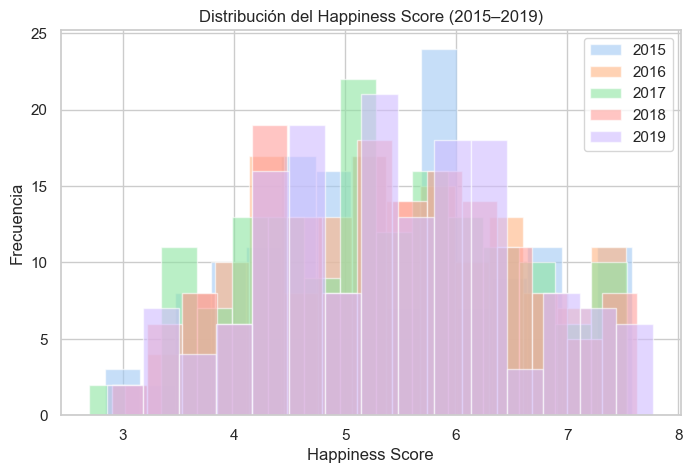

In [26]:
plt.figure(figsize=(8,5))
for y, d in raw.items():
    score_col = get_colname(d, "score")
    if score_col is None: 
        print(f"[{y}] Sin columna de Score.")
        continue
    plt.hist(d[score_col].dropna(), bins=15, alpha=0.6, label=str(y))

plt.title("Distribución del Happiness Score (2015–2019)")
plt.xlabel("Happiness Score")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


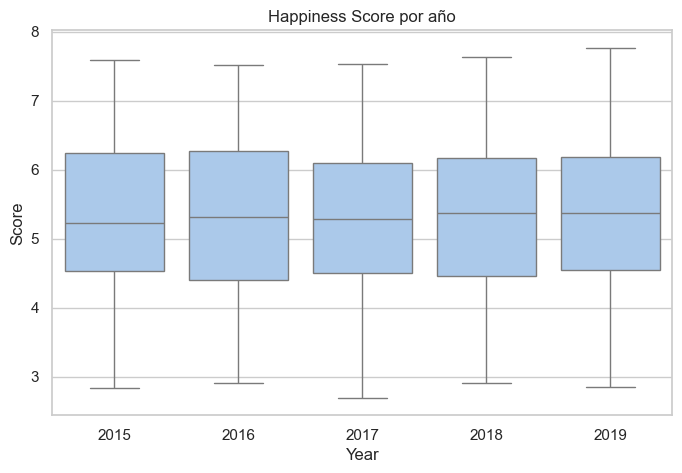

In [27]:
tmp = []
for y, d in raw.items():
    c = get_colname(d, "score")
    if c is not None:
        t = d[[c]].copy()
        t["Year"] = y
        t.columns = ["Score","Year"]
        tmp.append(t)

if tmp:
    box = pd.concat(tmp, ignore_index=True)
    plt.figure(figsize=(8,5))
    sns.boxplot(data=box, x="Year", y="Score")
    plt.title("Happiness Score por año")
    plt.show()


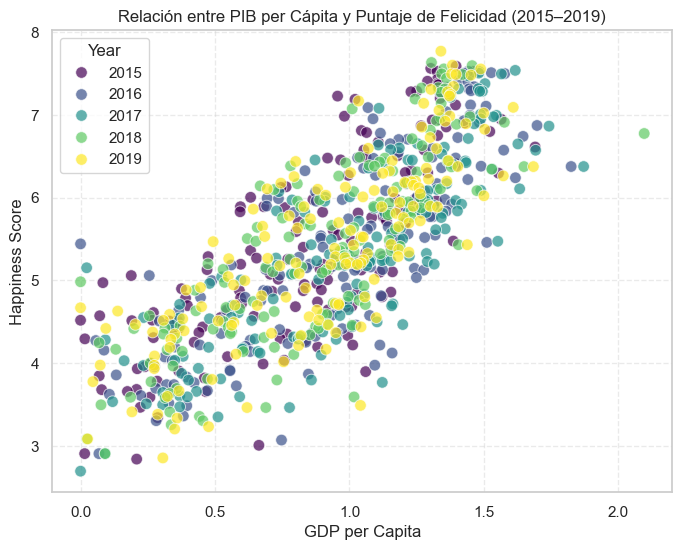

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_all,
    x="GDP per Capita",
    y="Happiness Score",
    hue="Year",
    palette="viridis",
    alpha=0.7,
    s=70
)
plt.title("Relación entre PIB per Cápita y Puntaje de Felicidad (2015–2019)")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend(title="Year", loc="best")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


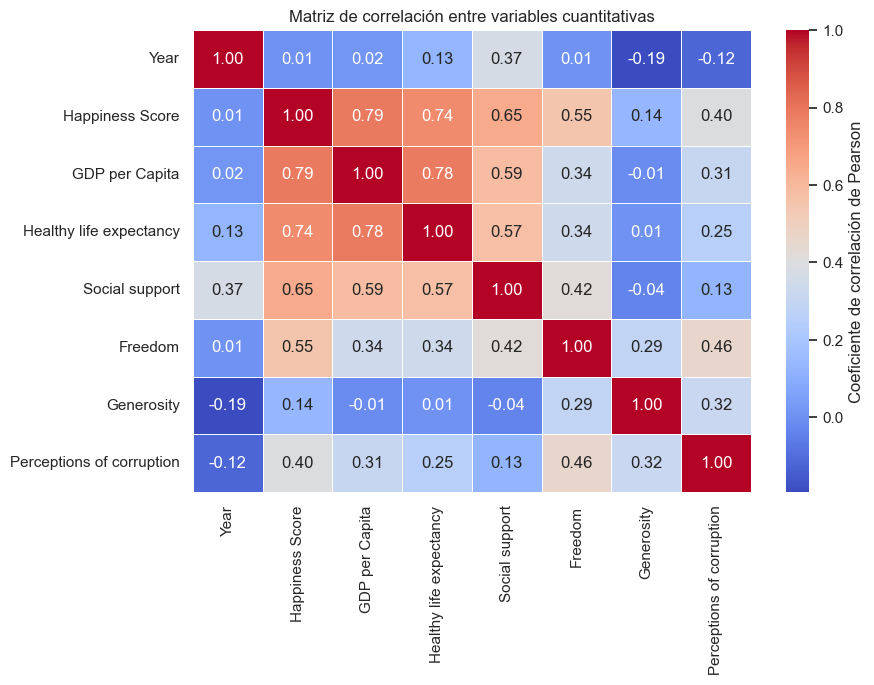

In [29]:
plt.figure(figsize=(9,6))
corr = df_all.corr(numeric_only=True)
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={'label': 'Coeficiente de correlación de Pearson'}
)
plt.title("Matriz de correlación entre variables cuantitativas")
plt.show()
